# Analyzing Ibovespa's stocks individual returns

---

By Fabio Prikladnicki [(Github)](https://github.com/fabiopri)

---

In this code, we'll analyze **returns of individual stocks which compose Ibovespa** (the reference index of B3, the Brazilian stock exchange) in the **last 5 years**.

This analysis is for educational purposes only and does not address survivorship bias.

### Importing libraries

In [1]:
# Data wrangling
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go

# Datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Stock data
import yfinance as yf

### Reading a CSV with Ibovespa's composition in August 10th, 2023

In [2]:
ibov_raw = pd.read_csv('ibov_2023-08-10.csv', sep=';', encoding='UTF-8')
ibov_raw.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,234.689.601,"0,42"
1,ALSO3,ALIANSCSONAE,ON NM,532.365.440,"0,628"
2,ALPA4,ALPARGATAS,PN N1,201.952.502,"0,093"
3,ABEV3,AMBEV S/A,ON,4.386.652.506,"3,058"
4,ARZZ3,AREZZO CO,ON NM,60.758.326,"0,244"


### Extracting stocks' symbols and converting it to a list

In [3]:
ibov_list = ibov_raw['Código'].tolist()
ibov_list[:5]

['RRRP3', 'ALSO3', 'ALPA4', 'ABEV3', 'ARZZ3']

### Including '.SA' suffix so we can download Brazilian stock data from Yahoo Finance

In [4]:
ibov_list = [x + '.SA' for x in ibov_list]
ibov_list[:5]

['RRRP3.SA', 'ALSO3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ARZZ3.SA']

### Setting start date (5 years ago) and end date (yesterday) for stock data

In [5]:
# Dia final: ontem
end = datetime.today() - relativedelta(days=1)

# Dia de início: 5 anos atrás
start = end - relativedelta(years=5)

### Downloading stock data from Yahoo Finance

In [6]:
ibov = yf.download(ibov_list, start = start, end = end)['Adj Close']

[*********************100%***********************]  85 of 85 completed


In [7]:
ibov.head(3)

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765947,38.659679,NaN,24.020000,6.410458,24.373320,13.192667,14.686311,...,9.646333,8.898018,19.825266,6.944071,36.790123,13.876578,7.07,25.226334,8.419003,22.127192
2018-08-10,16.005365,9.514611,20.356218,38.158207,NaN,23.100000,6.278169,23.031338,12.504268,13.955149,...,9.349775,8.758392,18.664661,6.439344,36.697861,13.262068,6.68,24.710831,8.078700,21.470915
2018-08-13,16.200035,9.545986,20.365530,37.456123,NaN,23.360001,6.311242,23.140146,12.809127,14.226311,...,9.366252,8.780606,19.034487,6.594019,37.102383,13.333521,6.61,25.159389,8.218552,21.834528


### Checking columns with NA values

In [8]:
ibov.columns[ibov.isna().any()].tolist()

['ASAI3.SA',
 'BPAC11.SA',
 'CASH3.SA',
 'CMIN3.SA',
 'ENGI11.SA',
 'IGTI11.SA',
 'KLBN11.SA',
 'LWSA3.SA',
 'NTCO3.SA',
 'PETZ3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SOMA3.SA',
 'TAEE11.SA']

In [9]:
# Visualizing columns with NA values

ibov.loc[:, ibov.isna().any()]

,ASAI3.SA,BPAC11.SA,CASH3.SA,CMIN3.SA,ENGI11.SA,IGTI11.SA,KLBN11.SA,LWSA3.SA,NTCO3.SA,PETZ3.SA,RAIZ4.SA,RDOR3.SA,RRRP3.SA,SANB11.SA,SOMA3.SA,TAEE11.SA
Date,,,,,,,,,,,,,,,,
2018-08-09,NaN,4.357040,NaN,NaN,23.536377,NaN,15.632919,NaN,NaN,NaN,NaN,NaN,NaN,27.182318,NaN,12.128621
2018-08-10,NaN,4.212881,NaN,NaN,23.080568,NaN,15.318812,NaN,NaN,NaN,NaN,NaN,NaN,26.121262,NaN,11.954280
2018-08-13,NaN,4.389314,NaN,NaN,23.445219,NaN,15.423513,NaN,NaN,NaN,NaN,NaN,NaN,26.327581,NaN,12.071358
2018-08-14,NaN,4.479086,NaN,NaN,23.710419,NaN,15.584595,NaN,NaN,NaN,NaN,NaN,NaN,26.386520,NaN,12.508855
2018-08-15,NaN,4.398983,NaN,NaN,23.266840,NaN,15.544325,NaN,NaN,NaN,NaN,NaN,NaN,26.239159,NaN,12.662910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,13.80,32.983196,9.31,4.29,49.299999,22.580000,23.219999,7.14,17.799999,6.85,4.10,34.540001,35.880001,28.440001,11.24,35.508404
2023-08-04,13.69,32.548557,9.50,4.21,48.980000,22.410000,23.510000,7.09,17.730000,7.04,4.08,34.889999,36.680000,27.820000,11.36,35.586403
2023-08-07,13.87,33.009998,8.84,4.27,48.340000,22.180000,23.330000,7.09,17.520000,6.88,4.02,34.630001,36.320000,27.840000,11.17,35.440155


#### I checked previously that there are missing values for some stocks before 2021. To simplify our analysis, we'll drop columns with NA

In [10]:
ibov_no_na = ibov.dropna(axis='columns')
ibov_no_na.head()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765947,38.659679,24.020000,6.410458,24.373320,13.192667,14.686311,16.139557,...,9.646333,8.898018,19.825266,6.944071,36.790123,13.876578,7.07,25.226334,8.419003,22.127192
2018-08-10,16.005365,9.514611,20.356218,38.158207,23.100000,6.278169,23.031338,12.504268,13.955149,15.709776,...,9.349775,8.758392,18.664661,6.439344,36.697861,13.262068,6.68,24.710831,8.078700,21.470915
2018-08-13,16.200035,9.545986,20.365530,37.456123,23.360001,6.311242,23.140146,12.809127,14.226311,16.185829,...,9.366252,8.780606,19.034487,6.594019,37.102383,13.333521,6.61,25.159389,8.218552,21.834528
2018-08-14,16.428564,9.961710,20.365530,38.522911,24.120001,6.429749,23.938084,12.986142,14.468420,16.587074,...,9.654570,8.942445,19.975023,6.724271,37.443031,13.976620,7.08,25.246416,8.190578,22.455330
2018-08-15,16.437025,9.718551,20.365530,37.757008,24.309999,6.391165,23.430304,12.902554,14.294102,17.307955,...,9.522770,8.885325,19.381479,6.455626,35.775269,13.519307,6.70,25.052265,8.218552,20.885588


### Extracting the first and last rows so we can calculate returns in the last 5 years

In [11]:
ibov_pri_ult = ibov_no_na.iloc[[0, -1]]
ibov_pri_ult

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,16.310068,9.765615,20.765947,38.659679,24.02,6.410458,24.37332,13.192667,14.686311,16.139557,...,9.646333,8.898018,19.825266,6.944071,36.790123,13.876578,7.07,25.226334,8.419003,22.127192
2023-08-09,14.380000,9.500000,24.330000,82.820000,16.59,14.300000,46.73000,13.730000,15.330000,32.160000,...,14.710000,28.290001,19.170000,7.000000,66.849998,16.870001,1.89,42.310001,40.779999,21.730000


In [12]:
ibov_delta = round((ibov_pri_ult.pct_change().dropna() * 100), 2)
ibov_delta

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,-11.83,-2.72,17.16,114.23,-30.93,123.07,91.73,4.07,4.38,99.26,...,52.49,217.94,-3.31,0.81,81.71,21.57,-73.27,67.72,384.38,-1.8


### Transposing the dataset for a better visualization and changing column names (also removing '.SA' suffix)

In [13]:
# Transpondo o DataFrame para ficar mais fácil de plotar

ibov_delta_transp = ibov_delta.T

ibov_delta_transp.columns = ['Delta']
ibov_delta_transp.index.names = ['Ticker']
ibov_delta_transp.index = ibov_delta_transp.index.str.removesuffix('.SA')
ibov_delta_transp.head()

,Delta
Ticker,
ABEV3,-11.83
ALPA4,-2.72
ALSO3,17.16
ARZZ3,114.23
AZUL4,-30.93


In [14]:
ibov_delta_transp.head()

,Delta
Ticker,
ABEV3,-11.83
ALPA4,-2.72
ALSO3,17.16
ARZZ3,114.23
AZUL4,-30.93


### Boxplot of returns

#### We can spot an outlier at the top. We'll check this later

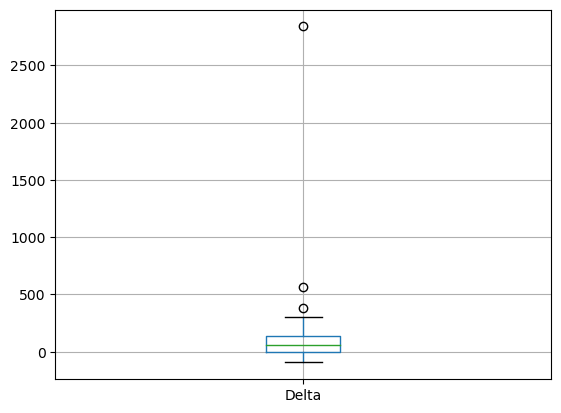

In [15]:
# Boxplot com os retornos

ibov_delta_transp.boxplot();

### Density chart of returns

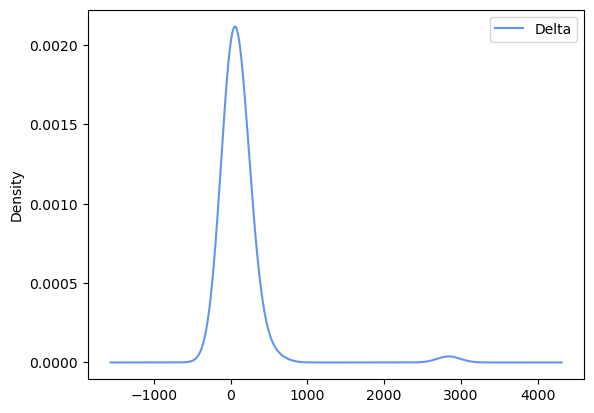

In [16]:
ibov_delta_transp.plot.kde(color='cornflowerblue');

### Histogram of returns

#### The number of bins is set to the number of stocks

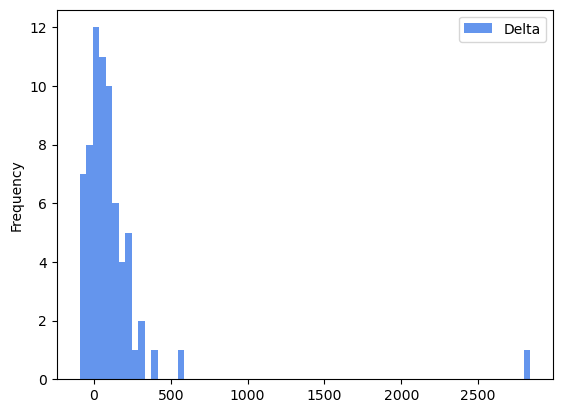

In [17]:
ibov_delta_transp.plot.hist(bins=ibov_delta_transp.shape[0], color='cornflowerblue');

### What are the 10 stocks with higher returns in the last 5 years?

#### Here we can see that PRIO3 is a "natural" outlier

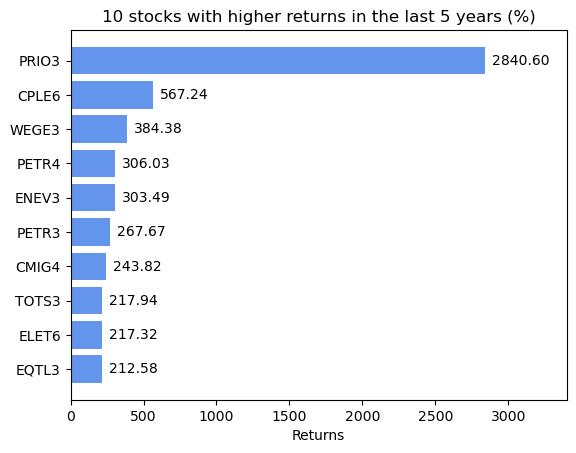

In [18]:
# Sorting stocks by higher returns
ibov_5y_top10 = ibov_delta_transp.sort_values(by='Delta', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots()

hbars = ax.barh(ibov_5y_top10.index, ibov_5y_top10['Delta'], color='cornflowerblue')
ax.set_xlabel('Returns')
ax.set_title('10 stocks with higher returns in the last 5 years (%)')
ax.invert_yaxis()

ax.bar_label(hbars, fmt='%.2f', padding=5)
ax.set_xlim(right=3400)

plt.show()

### What are the 10 stocks with lower returns in the last 5 years?

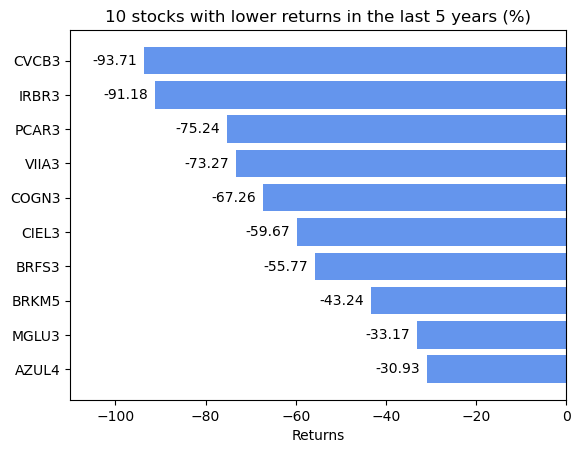

In [19]:
# Sorting stocks by lower returns
ibov_5y_bottom10 = ibov_delta_transp.sort_values(by='Delta').head(10)

# Plotting
fig, ax = plt.subplots()

hbars = ax.barh(ibov_5y_bottom10.index, ibov_5y_bottom10['Delta'], color='cornflowerblue')
ax.set_xlabel('Returns')
ax.set_title('10 stocks with lower returns in the last 5 years (%)')
ax.invert_yaxis()

ax.bar_label(hbars, fmt='%.2f', padding=5)
ax.set_xlim(-110, 0)

plt.show()

### What is the proportion of positive and negative returns in the last 5 years?

In [20]:
# Indicando ações com retorno negativo e positivo

ibov_delta_transp = ibov_delta_transp.assign(
    PosNeg = ['Positive' if x > 0 else 'Negative' for x in ibov_delta_transp['Delta']])
ibov_delta_transp.head()

,Delta,PosNeg
Ticker,,
ABEV3,-11.83,Negative
ALPA4,-2.72,Negative
ALSO3,17.16,Positive
ARZZ3,114.23,Positive
AZUL4,-30.93,Negative


In [21]:
# Quantas ações tiveram retornos positivos e negativos

PosNeg = ibov_delta_transp['PosNeg'].value_counts().to_frame()
PosNeg

,PosNeg
Positive,49
Negative,20


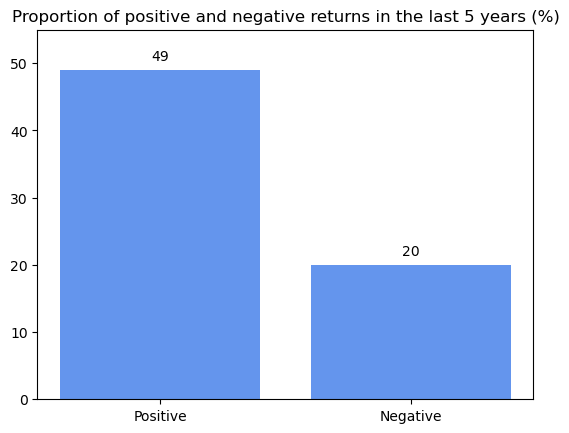

In [22]:
# Plotting
fig, ax = plt.subplots()

bars = ax.bar(PosNeg.index, PosNeg['PosNeg'], color='cornflowerblue')
ax.set_title('Proportion of positive and negative returns in the last 5 years (%)')

ax.bar_label(bars, padding=5)
ax.set_ylim(0, 55)

plt.show()